In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [5]:
data = pd.read_csv('F:/NCI/Data mining/datasets/run_or_walk.csv')
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


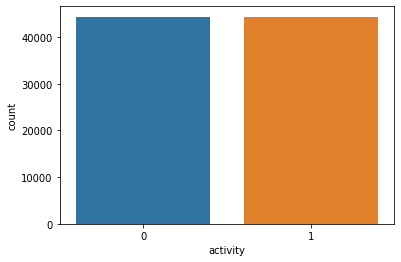

In [6]:
#Analysing the data
sns.countplot(x= "activity", data = data )

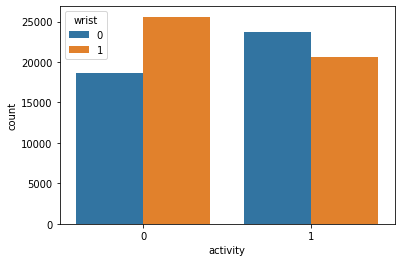

In [8]:
sns.countplot(x= "activity", hue = "wrist",data = data )

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
date              88588 non-null object
time              88588 non-null object
username          88588 non-null object
wrist             88588 non-null int64
activity          88588 non-null int64
acceleration_x    88588 non-null float64
acceleration_y    88588 non-null float64
acceleration_z    88588 non-null float64
gyro_x            88588 non-null float64
gyro_y            88588 non-null float64
gyro_z            88588 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [10]:
#DATA WRANGLING
data.isnull()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
88583,False,False,False,False,False,False,False,False,False,False,False
88584,False,False,False,False,False,False,False,False,False,False,False
88585,False,False,False,False,False,False,False,False,False,False,False
88586,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [12]:
data.drop(['date','time','username'],axis = 1, inplace = True)


In [13]:
data.head(5)

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [14]:
x = data.drop('activity',axis = 1)
y = data['activity']

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression()

In [20]:
logmodel.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictions = logmodel.predict(xtest)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     13169
           1       0.90      0.82      0.86     13408

    accuracy                           0.86     26577
   macro avg       0.87      0.86      0.86     26577
weighted avg       0.87      0.86      0.86     26577



In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [25]:
confusion_matrix(ytest,predictions)

array([[11967,  1202],
       [ 2452, 10956]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(ytest,predictions)

0.8625126989502201

In [31]:
cohen_kappa_score(ytest,predictions)

0.7252356048187079

In [33]:
mean_squared_error(ytest,predictions)

0.13748730104977988